In [30]:
%pip install numpy pandas keras scikit-learn seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

In [32]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:

y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, str): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [34]:
def OneHotEncode(y):
    y = y.astype(int)
    one_hot = np.zeros((y.size, y.max() + 1))
    one_hot[np.arange(y.size), y] = 1.0
    return one_hot

y_encoded = OneHotEncode(y).T
y_encoded


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(10, 70000))

In [35]:
def init_parameters(input_size, hidden_size, output_size):
    W1 = (np.random.rand(hidden_size, input_size)-0.5) * 0.6
    b1 = np.zeros((hidden_size, 1))
    W2 = (np.random.rand(output_size, hidden_size )-0.5) * 0.6
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

W1, b1, W2, b2 = init_parameters(784, 10, 10)

print("W1 shape:", W1.shape)
print("b1 shape:", b1.shape)

W1 shape: (10, 784)
b1 shape: (10, 1)


In [36]:
def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))
    return expZ / np.sum(expZ, axis=0)

    

In [37]:
def forwardPropagation(X, W1, b1, W2, b2):
    Z1 = W1@X +b1
    A1 = ReLU(Z1)
    Z2 = W2@A1 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [38]:
def ReLUDerivative(Z):
    return Z > 0  

In [39]:
def backwards_prop(X, y, Z1, A1, A2, W2):
    m = X.shape[1]
    dZ2 = A2 - y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1) / m
    dZ1 = W2.T @ dZ2 * ReLUDerivative(Z1)
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1) / m
    return dW1, db1, dW2, db2


In [40]:
def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, y):
    return np.mean(predictions == y)


def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1.reshape(b1.shape)
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2.reshape(b2.shape)
    return W1, b1, W2, b2

In [41]:
def gradient_descent(X, y, alpha, iterations):
    
    X = np.asarray(X) / 255.0  
    y = np.asarray(y)
    
    W1, b1, W2, b2 = init_parameters(X.shape[0], 10, y.shape[0])
    print(f"params initialized {W1.shape, b1.shape, W2.shape, b2.shape}")
    
    for i in range(iterations):
        
        Z1, A1, Z2, A2 = forwardPropagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backwards_prop(X, y, Z1, A1, A2, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 10 == 0:
            
            preds = get_predictions(A2)
            actual_y = np.argmax(y, axis=0)
            print(f"Iter {i} Acc: {get_accuracy(preds, actual_y):.2%}")
            
    return W1, b1, W2, b2

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded.T, test_size=0.2, random_state=42)
y_train= y_train.T
y_test = y_test.T

In [71]:
W1, b1, W2, b2 = gradient_descent(X_train.T, y_train, 0.05, 100)

params initialized ((10, 784), (10, 1), (10, 10), (10, 1))
Iter 0 Acc: 9.95%
Iter 10 Acc: 13.02%
Iter 20 Acc: 19.19%
Iter 30 Acc: 24.50%
Iter 40 Acc: 29.31%
Iter 50 Acc: 34.23%
Iter 60 Acc: 39.06%
Iter 70 Acc: 43.56%
Iter 80 Acc: 47.93%
Iter 90 Acc: 51.65%


In [72]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardPropagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

In [73]:
y_pred = make_predictions(X_test.T, W1, b1, W2, b2)
accuracy = get_accuracy(y_pred, np.argmax(y_test, axis=0))
print(f"Test Accuracy: {accuracy:.2%}")

Test Accuracy: 52.06%


In [79]:
Z1, A1, Z2, A2 = forwardPropagation(X_test.T/255, W1, b1, W2, b2)

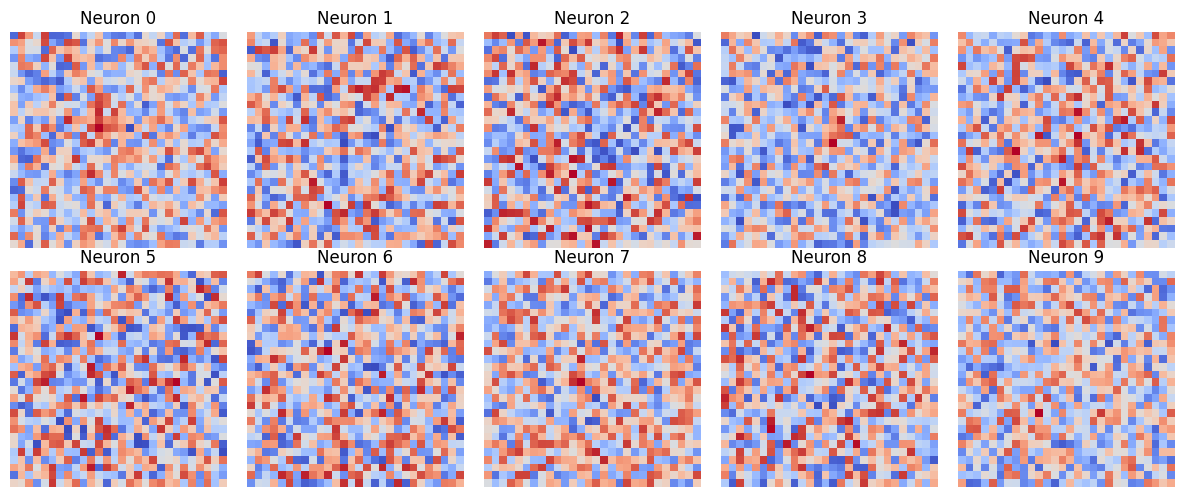

In [80]:
import matplotlib.pyplot as plt

def visualize_weights(W1):
    plt.figure(figsize=(12, 5))
    for i in range(10):
        
        plt.subplot(2, 5, i + 1)
        weight_image = W1[i].reshape(28, 28)
        plt.imshow(weight_image, cmap='coolwarm')
        plt.title(f"Neuron {i}")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

visualize_weights(W1)

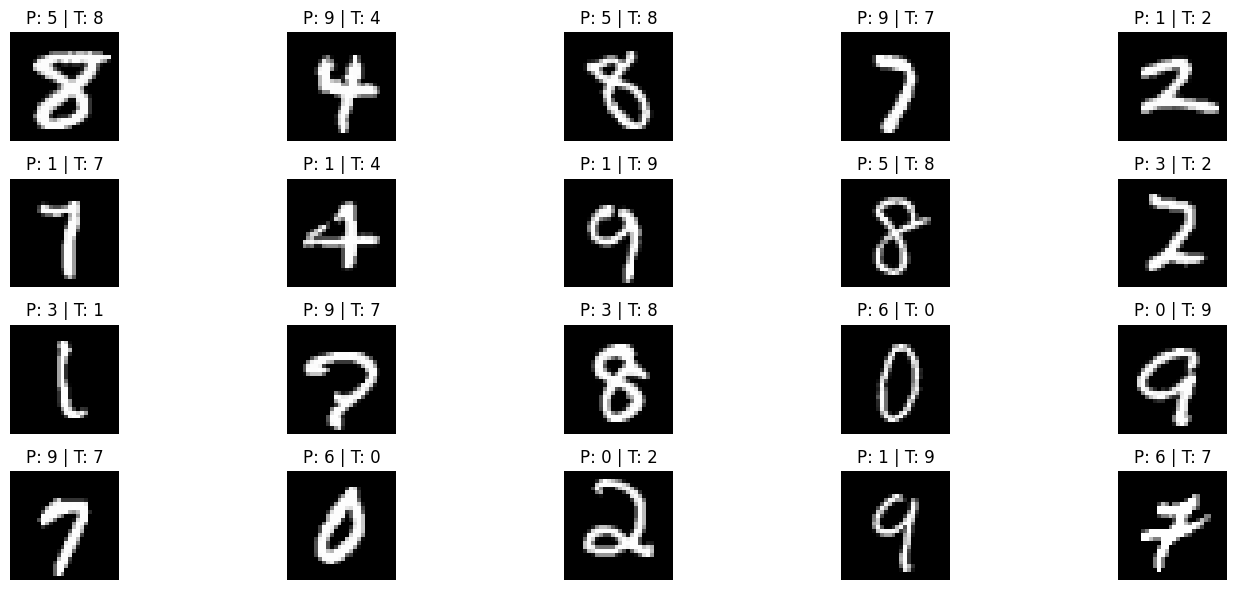

In [81]:
def show_mistakes(X, y_pred, y_true, num_images=20):
    if hasattr(X, 'to_numpy'):
        X = X.to_numpy()

    if X.shape[0] != 784:
        X = X.T
    
    mistakes = np.where(y_pred != y_true)[0]
    
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(mistakes[:num_images]):
        plt.subplot(int(num_images/5), 5, i + 1)
        
        pixel_data = X[:, idx].reshape(28, 28)
        
        plt.imshow(pixel_data, cmap='gray')
        plt.title(f"P: {y_pred[idx]} | T: {y_true[idx]}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

y_test_indices = np.argmax(y_test, axis=0)
show_mistakes(X_test, y_pred, y_test_indices)

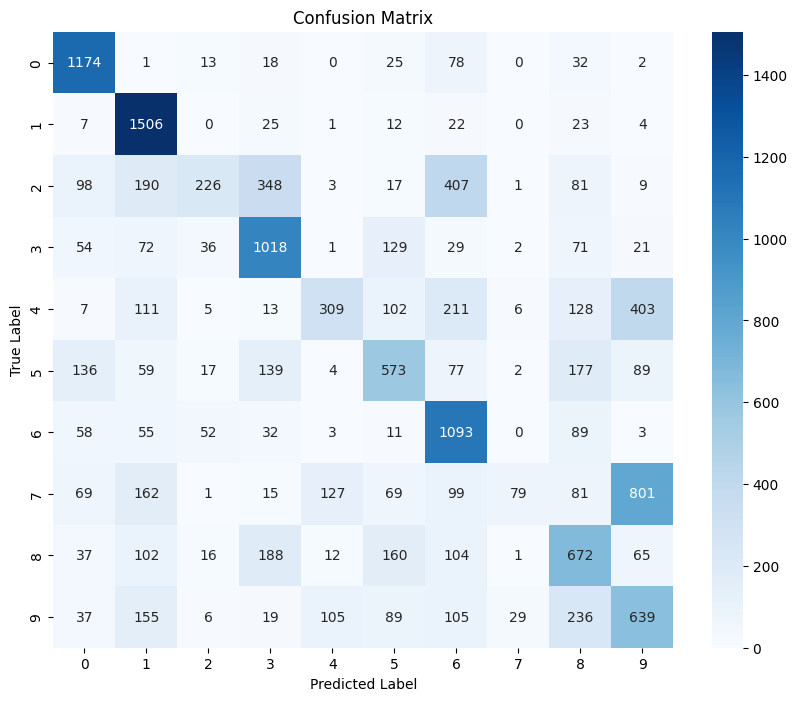

In [82]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion(y_test_indices, y_pred)



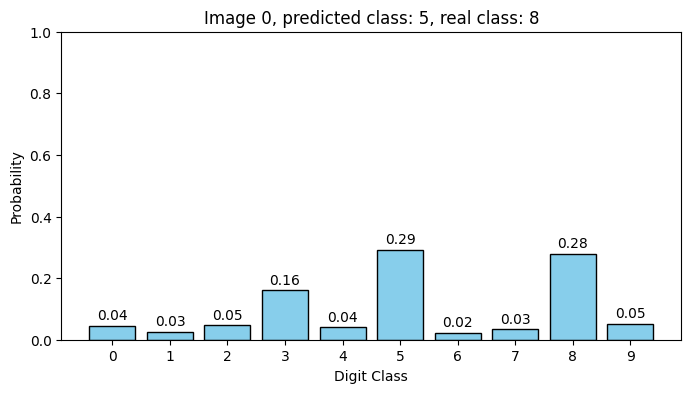

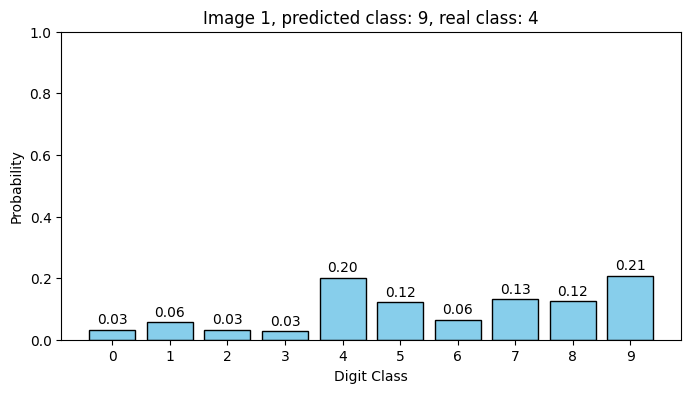

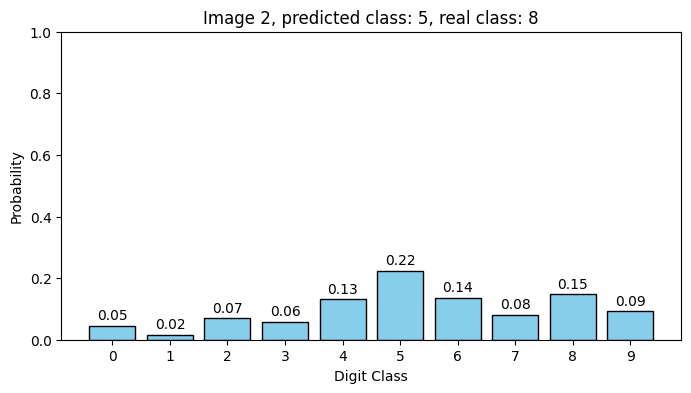

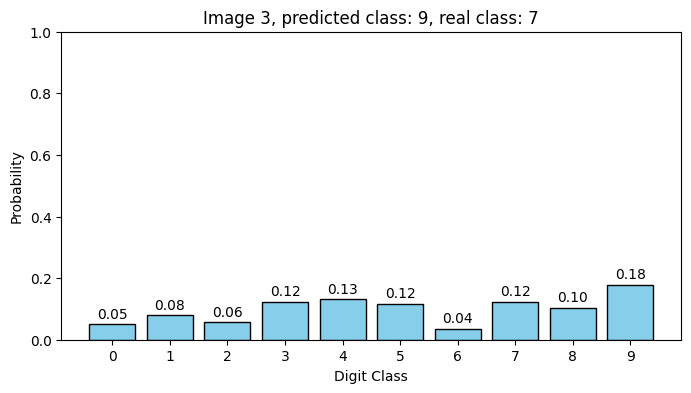

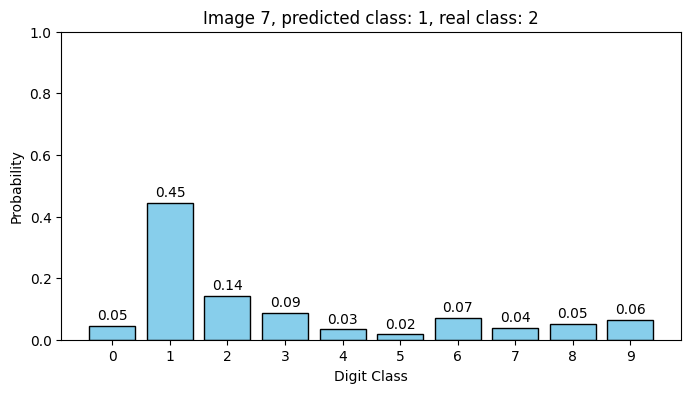

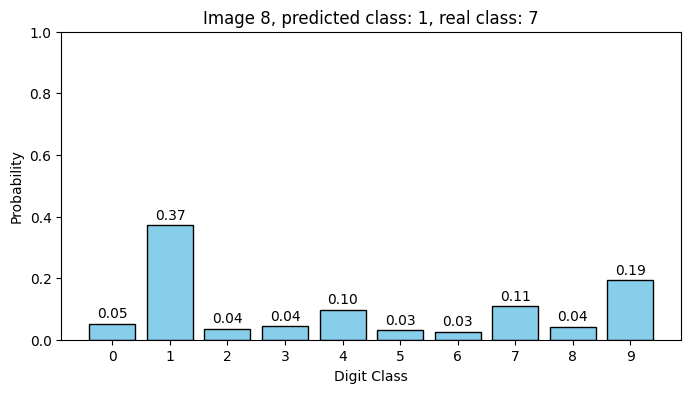

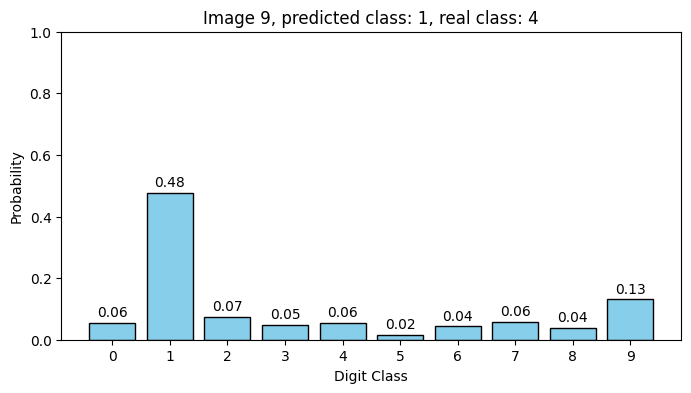

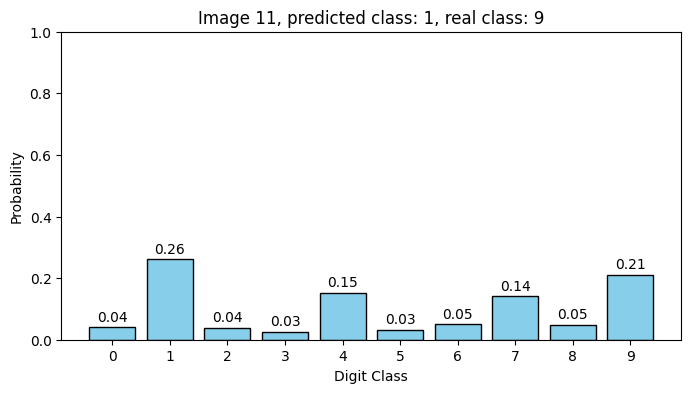

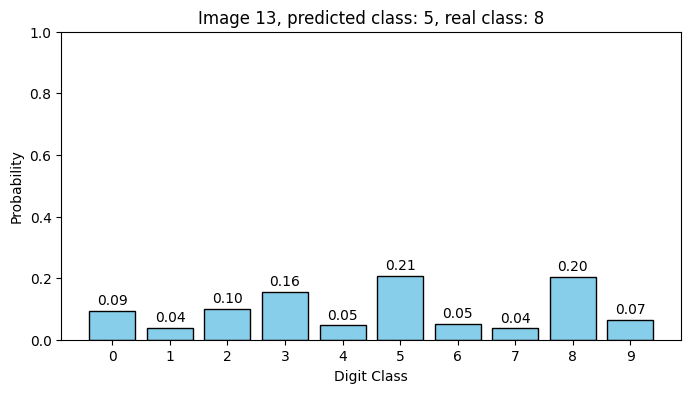

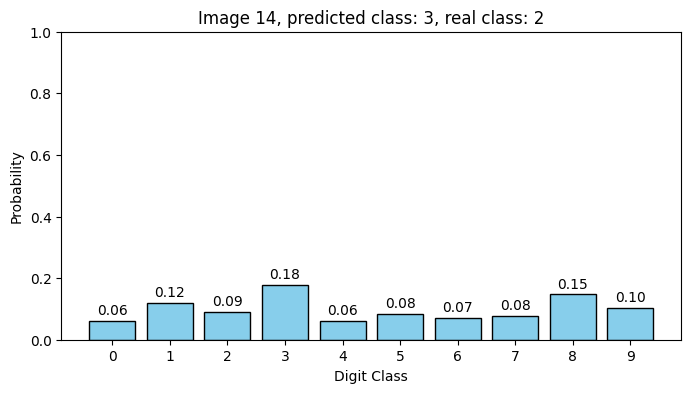

In [84]:
def plot_prediction_confidence(A2, index):
    # --- SAFETY STEP ---
    # If A2 is a DataFrame, get the raw values. 
    # If it's already a Numpy array, .values might still work, 
    # but np.asarray() is the safest way.
    A2_raw = np.asarray(A2)
    
    # Now this slicing will work perfectly by position
    probs = A2_raw[:, index]
    
    plt.figure(figsize=(8, 4))
    plt.bar(range(10), probs, color='skyblue', edgecolor='black')
    plt.xticks(range(10))
    plt.ylim(0, 1)
    plt.title(f'Image {index}, predicted class: {np.argmax(probs)}, real class: {np.argmax(y_test[:, index])}')
    plt.xlabel('Digit Class')
    plt.ylabel('Probability')
    
    # Let's add the actual numbers on top of the bars for clarity
    for i, val in enumerate(probs):
        plt.text(i, val + 0.02, f"{val:.2f}", ha='center')
        
    plt.show()

y_test_labels = np.argmax(y_test, axis=0)

# 2. NOW compare the two flat lists! 
# (This correctly returns the ID of the images, like 42, 105, 88...)
mistakes = np.where(y_pred != y_test_labels)[0]

# 3. Plot the first 10 real mistakes
for i in range(10):
    plot_prediction_confidence(A2, mistakes[i])